# Tensor Hypercontraction

SELECT and PREPARE for the molecular tensor hypercontraction (THC) hamiltonian

In [3]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq
from typing import *
import numpy as np

## `UniformSuperpositionTHC`
Prepare uniform superposition state for THC.

$$
    |0\rangle^{\otimes 2\log(M+1)} \rightarrow \sum_{\mu\le\nu}^{M} |\mu\rangle|\nu\rangle + \sum_{\mu}^{N/2}|\mu\rangle|\nu=M+1\rangle,
$$

where $M$ is the THC auxiliary dimension, and $N$ is the number of spin orbitals.

The toffoli complexity of this gate should be 10 * log(M+1) + 2 b_r - 9.
Currently it is a good deal larger due to:
    1. inverting inequality tests should not need more toffolis.
    2. We are not using phase-gradient gate toffoli cost for Ry rotations

#### Parameters
 - `num_mu`: THC auxiliary index dimension $M$
 - `num_spin_orb`: number of spin orbitals $N$ 

Registers:
- mu: $\mu$ register.
- nu: $\nu$ register.
- succ: ancilla flagging success of amplitude amplification.
- eq_nu_mp1: ancillas for flagging if $\nu = M+1$.

#### References
[Even more efficient quantum computations of chemistry through tensor hypercontraction](https://arxiv.org/pdf/2011.03494.pdf). Eq. 29.


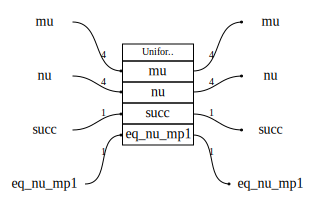

In [17]:
from qualtran.bloqs.chemistry.thc import UniformSuperpositionTHC

num_mu = 10
num_spin_orb = 4
bloq = UniformSuperpositionTHC(num_mu=num_mu, num_spin_orb=num_spin_orb)
show_bloq(bloq)

## `PrepareTHC`
State Preparation for THC Hamilontian.

Prepares the state

$$
    \frac{1}{\sqrt{\lambda}}|+\rangle|+\rangle\left[
        \sum_\ell^{N/2} \sqrt{t_\ell}|\ell\rangle|M+1\rangle
        + \frac{1}{\sqrt{2}} \sum_{\mu\le\nu}^M \sqrt{\zeta_{\mu\nu}} |\mu\rangle|\nu\rangle
    \right].
$$

Note we use UniformSuperpositionTHC as a subroutine as part of this bloq in
contrast to the reference which keeps them separate.

#### Parameters
 - `num_mu`: THC auxiliary index dimension $M$
 - `num_spin_orb`: number of spin orbitals $N$
 - `alt_mu`: Alternate values for mu indices.
 - `alt_nu`: Alternate values for nu indices.
 - `alt_theta`: Alternate values for theta indices.
 - `theta`: Signs of lcu coefficients.
 - `keep`: keep values.
 - `keep_bitsize`: number of bits for keep register for coherent alias sampling. 

Registers:
 - mu: $\mu$ register.
 - nu: $\nu$ register.
 - theta: sign register.
 - succ: success flag qubit from uniform state preparation
 - eq_nu_mp1: flag for if $nu = M+1$
 - plus_a / plus_b: plus state for controlled swaps on spins.

#### References
[Even more efficient quantum computations of chemistry through tensor hypercontraction](https://arxiv.org/pdf/2011.03494.pdf) Fig. 2 and Fig. 3.


In [14]:
from qualtran.bloqs.chemistry.thc import PrepareTHC

num_spat = 4
num_mu = 8
t_l = np.random.normal(0, 1, size=num_spat)
zeta = np.random.normal(0, 1, size=(num_mu, num_mu))
zeta = 0.5 * (zeta + zeta.T)
eps = 1e-3
bloq = PrepareTHC.build(t_l, zeta, probability_epsilon=eps)

T-count:   1144
Rotations: 0
Cliffords: 4143



In [ ]:
from qualtran.resource_counting import get_bloq_counts_graph, print_counts_graph, \
    GraphvizCounts, markdown_counts_graph, markdown_counts_sigma, SympySymbolAllocator
from qualtran.bloqs.and_bloq import MultiAnd, And

graph, sigma = get_bloq_counts_graph(bloq)
print_counts_graph(graph)